In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
some_digit = X[360]
some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

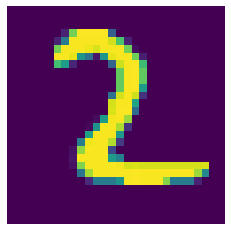

In [69]:
plt.imshow(some_digit_image, interpolation='nearest')
plt.axis('off')

In [70]:
y[360]

'2'

In [71]:
X_train, X_test = X[:600], X[600:1200]

In [72]:
y_train, y_test = y[:600], y[600:1200]

In [73]:
shuffle_index = np.random.permutation(600)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [74]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [75]:
# y_train

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
clf = LogisticRegression()

In [78]:
clf.fit(X_train, y_train_2)

C:\Users\priya\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
clf.predict([some_digit])

array([ True])

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
a = cross_val_score(clf, X_train, y_train_2, cv=3, scoring='accuracy')
a

array([0.93, 0.96, 0.95])

In [82]:
a.mean()

0.9466666666666667

In [83]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train_2, cv=3)

In [85]:
# y_train_pred

## Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_train_2, y_train_pred)

array([[522,  14],
       [ 18,  46]], dtype=int64)

In [92]:
#Prefect Matrix
confusion_matrix(y_train_2, y_train_2)

array([[536,   0],
       [  0,  64]], dtype=int64)

### Precision & Recall

In [93]:
from sklearn.metrics import precision_score, recall_score

In [94]:
precision_score(y_train_2, y_train_pred)

0.7666666666666667

In [95]:
recall_score(y_train_2, y_train_pred)

0.71875

## F1-Score

In [96]:
from sklearn.metrics import f1_score

In [97]:
f1_score(y_train_2, y_train_pred)

0.7419354838709677

## Precision-Recall Curve

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
y_scores = cross_val_predict(clf, X_train, y_train_2, cv=3, method='decision_function')

In [105]:
precision, recall, thresholds = precision_recall_curve(y_train_2, y_scores)

In [106]:
precision

array([0.21192053, 0.20930233, 0.21      , 0.21070234, 0.2114094 ,
       0.21212121, 0.21283784, 0.21355932, 0.21428571, 0.21501706,
       0.21575342, 0.21649485, 0.21724138, 0.21799308, 0.21875   ,
       0.2195122 , 0.22027972, 0.22105263, 0.22183099, 0.22261484,
       0.22340426, 0.22419929, 0.225     , 0.22580645, 0.22661871,
       0.22743682, 0.22826087, 0.22909091, 0.22992701, 0.23076923,
       0.23161765, 0.23247232, 0.23333333, 0.23420074, 0.23507463,
       0.23595506, 0.23684211, 0.23773585, 0.23863636, 0.23954373,
       0.24045802, 0.24137931, 0.24230769, 0.24324324, 0.24418605,
       0.24513619, 0.24609375, 0.24705882, 0.2480315 , 0.24901186,
       0.25      , 0.25099602, 0.252     , 0.25301205, 0.25403226,
       0.25506073, 0.25609756, 0.25714286, 0.25819672, 0.25925926,
       0.26033058, 0.26141079, 0.2625    , 0.26359833, 0.26470588,
       0.26582278, 0.26694915, 0.26808511, 0.26923077, 0.27038627,
       0.27155172, 0.27272727, 0.27391304, 0.27510917, 0.27631

In [107]:
recall

array([1.      , 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.984375, 0.984375, 0.984375, 0.984375, 0.984375, 0.984375,
       0.96875 , 0.96875 , 0.96875 , 0.96875 , 0.96875 , 0.96875 ,
       0.96875 , 0.953125, 0.953125, 0.953125, 0.953125, 0.953

In [108]:
thresholds

array([-22.60945966, -22.57465681, -22.57074062, -22.4799786 ,
       -22.39999452, -22.35994585, -22.35071603, -22.34059253,
       -22.33363878, -22.29874433, -22.17306217, -22.10632899,
       -22.02326758, -21.87479735, -21.79546128, -21.69242592,
       -21.68908602, -21.66463448, -21.50356654, -21.32523388,
       -21.28932818, -21.25724754, -21.07308949, -20.91785065,
       -20.7920203 , -20.5978684 , -20.44191125, -20.44027848,
       -20.30790694, -20.23334886, -20.17456365, -20.13905943,
       -20.04464191, -19.99493404, -19.96259508, -19.92467672,
       -19.80525148, -19.60222733, -19.59616541, -19.51981049,
       -19.4142839 , -19.22733025, -19.22116155, -19.18708155,
       -19.10767955, -19.0145226 , -18.96101703, -18.90808201,
       -18.90781765, -18.78871258, -18.7491748 , -18.48886188,
       -18.3728241 , -18.34403081, -18.33996299, -18.30048117,
       -18.1595989 , -18.06532972, -18.00071049, -17.96896095,
       -17.94637562, -17.94166802, -17.85090721, -17.85

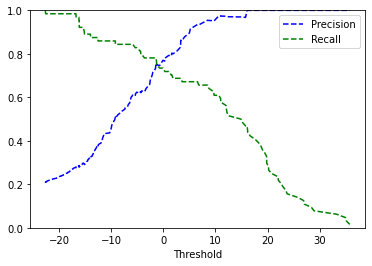

In [116]:
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.ylim([0,1])
plt.legend()
plt.show()